# New York Airbnb Price Prediction

## STEP 1: DATA ACQUISITION

In [189]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_70d88496ae9f44f2ba8596f5b0683788 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1y4ZFjqIwkTS3UBqkG-60qQ9YjdUUN0eR_VTvn_MEist',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_70d88496ae9f44f2ba8596f5b0683788.get_object(Bucket='capstoneprojectsrinath-donotdelete-pr-qxq1bdtjnl2ivr',Key='AB_NYC_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [190]:
df.shape

(48895, 16)

# STEP 2: DATA CLEANING AND PRE-PROCESSING

In [191]:
#cHECKING WHICH COLUMNS HAVE HOW MANY NA VALUES
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [192]:
#DROPPING THE FOLLOWING COLUMNS AS THEY MAKE NO SENSE WHILE APPLYING MODELS
df = df.drop(columns=['last_review','id','name','host_name','host_id'],axis=1)

In [193]:
#CHECKING THE STATISTICS OF THE DATA. THERE ARE OUTLIERS IN PRICE, MINIMUM NIGHTS, NUMBER OF REVIEWS, REVIEWS PER MONTH, CALCULATED HOST LISTINGS COUNT. 
df.describe()  

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [194]:
#BEFORE TRYING TO REDUCE THE OUTLIERS, WE FIRST FILL THE REVIEWS PER MONTH HAVING NA VALUES WITH 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [195]:
#CHECKING TH STATS AGAIN
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [196]:
#NOW WE HAVE ENTIRE FILLED DATASET
df.count().sort_values()

neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [197]:
#CALCULATING Z-SCORE TO HANDLE OUTLIERS
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

[[1.4938492  0.43765209 0.01549307 ... 0.55151094 0.03471643 1.91625031]
 [0.45243602 0.68463915 0.30097355 ... 0.4450791  0.15610444 1.84027456]
 [1.46839948 0.22249666 0.01132904 ... 0.68298556 0.18645145 1.91625031]
 ...
 [1.57348017 0.07582101 0.15707024 ... 0.68298556 0.18645145 0.65173008]
 [0.52377353 0.84388081 0.4069123  ... 0.68298556 0.03471643 0.84166946]
 [0.64352518 0.8050995  0.2611711  ... 0.68298556 0.18645145 0.68212038]]
(44475, 11)


## Exploratory Data Analysis:

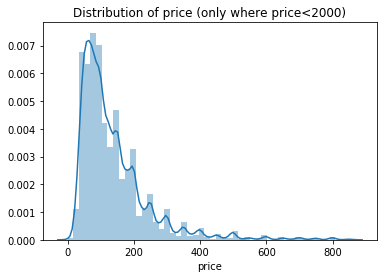

In [199]:
import seaborn as sns

#distribution of price less than 2000
sns.distplot(df[df.price<2000].price)
plt.title('Distribution of price (only where price<2000)')
plt.show()

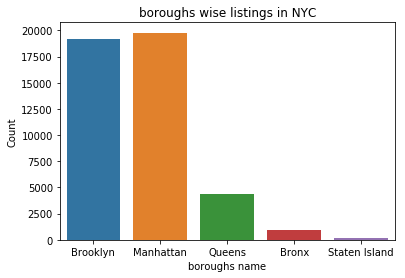

In [200]:
sns.countplot(df['neighbourhood_group'])
plt.title('boroughs wise listings in NYC')
plt.xlabel('boroughs name')
plt.ylabel('Count')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


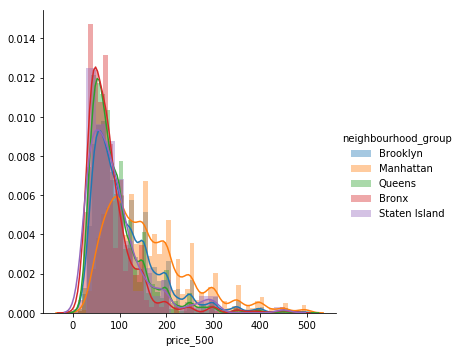

In [202]:
df['price_500']=df[df.price<500].price
sns.FacetGrid(df,hue='neighbourhood_group',size=5).map(sns.distplot,'price_500').add_legend()
plt.show()

### Making separate dataframes of neighbourhood groups and trying to find count of venues near each airbnb house.

In [86]:
brooklyn=df.loc[df['neighbourhood_group'] == 'Brooklyn']
manhattan=df.loc[df['neighbourhood_group'] == 'Manhattan']
bronx=df.loc[df['neighbourhood_group'] == 'Bronx']
queens=df.loc[df['neighbourhood_group'] == 'Queens']
statenisland=df.loc[df['neighbourhood_group'] == 'Staten Island']

# To count the number of venues near a neighbourhood using Foursquare API

In [94]:
import requests
from pandas.io.json import json_normalize
@hidden_cell

CLIENT_ID=''
CLIENT_SECRET=''
VERSION='20191114'
radius=500
limit=100

count_of_venues=[]

for lat,long in zip(statenisland['latitude'],statenisland['longitude']):
    try:
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,radius,limit)
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']
        count_of_venues.append(len(venues))
    except Exception as e:
        pass

## Since I had a limit on the number of calls using foursquare. I would be analyzing the prices of Bronx only.(Number of rows=767). But the idea can be extended to other neighbourhoods as well.

## Analysis of Bronx

### 1. Revising the bronx dataframe by adding number of venues

In [93]:
bronx=bronx[0:767]
count_of_venues_bronx=count_of_venues
len(count_of_venues_bronx)
bronx['Number of Venues(500m range)']=count_of_venues_bronx
bronx.reset_index()

,index,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Number of Venues(500m range)
0,207,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323,35
1,260,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,0.00,7,349,11
2,261,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,0.50,13,365,13
3,309,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,0.35,2,346,25
4,484,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232,17
5,645,Bronx,Kingsbridge,40.86790,-73.90023,Private room,42,2,108,1.36,2,302,31
6,966,Bronx,Spuyten Duyvil,40.87991,-73.91673,Entire home/apt,120,2,47,1.22,1,318,7
7,1060,Bronx,Mott Haven,40.81128,-73.92399,Private room,49,1,23,0.27,1,333,20
8,1069,Bronx,Longwood,40.81611,-73.89909,Entire home/apt,100,5,82,0.96,1,63,21
9,1167,Bronx,Allerton,40.86870,-73.85240,Private room,35,7,2,0.17,1,90,13


In [97]:
#Changing the categorical variables room_type to 0,1,2 respectively.
bronx['room_type'].replace(to_replace=['Shared room','Private room','Entire home/apt'], value=[0,1,2],inplace=True)

In [135]:
# Dropping Neighbourhood and neighbourhood_group columns
bronx.head()
newbronx=bronx.drop(columns=['neighbourhood_group','neighbourhood'],axis=1)
newbronx

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Number of Venues(500m range)
207,40.83075,-73.93058,1,45,1,138,1.45,3,323,35
260,40.81309,-73.85514,1,90,2,0,0.00,7,349,11
261,40.88057,-73.83572,2,105,2,38,0.50,13,365,13
309,40.87207,-73.90193,2,90,30,4,0.35,2,346,25
484,40.85811,-73.90675,1,37,4,117,1.21,1,232,17
645,40.86790,-73.90023,1,42,2,108,1.36,2,302,31
966,40.87991,-73.91673,2,120,2,47,1.22,1,318,7
1060,40.81128,-73.92399,1,49,1,23,0.27,1,333,20
1069,40.81611,-73.89909,2,100,5,82,0.96,1,63,21
1167,40.86870,-73.85240,1,35,7,2,0.17,1,90,13


# STEP 3: MODELLING 

## a. Linear Regression without Standardizing and using all 9 numeric attributes as input.

In [181]:
X=newbronx[['latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','Number of Venues(500m range)']]
y=newbronx['price']

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
latitude,-112.447664
longitude,45.970966
room_type,67.515427
minimum_nights,-2.178560
number_of_reviews,-0.241778
reviews_per_month,-7.030444
calculated_host_listings_count,2.241051
availability_365,0.086791
Number of Venues(500m range),-0.062869


In [185]:
y_pred = regressor.predict(X_test)

In [186]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(20)

,Actual,Predicted
37567,65,60.502582
11457,38,78.360381
10781,63,57.489533
2411,65,77.106690
32797,35,46.838391
9765,40,46.063849
24609,80,83.381098
35075,65,96.108842
26765,35,93.306384
18283,175,134.603909


In [188]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 84.00695693754828


## b. Linear Regression using standardizing and using all 9 numeric attributes as input.

In [119]:
from sklearn import preprocessing
standardized_X_train = preprocessing.scale(X_train)
standardized_X_test = preprocessing.scale(X_test)
standardized_X_train

array([[ 0.32007486,  1.1986801 , -0.53251191, ...,  1.16232602,
         1.48043037,  0.25449072],
       [-0.87854711, -0.8495887 ,  1.35436556, ..., -0.46812215,
        -1.15980694, -0.07899114],
       [ 0.6151391 , -0.51525711,  1.35436556, ..., -0.06051011,
        -0.87046587,  1.85520365],
       ...,
       [ 0.30497475, -1.11855   , -0.53251191, ..., -0.46812215,
         1.46596331, -1.27952583],
       [-0.71571083, -0.45866791, -0.53251191, ..., -0.46812215,
        -1.15980694, -0.81265123],
       [-0.77651936, -1.05090314, -0.53251191, ..., -0.46812215,
         1.30682572,  0.7880617 ]])

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(standardized_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
latitude,-2.755321
longitude,1.413511
room_type,35.781564
minimum_nights,-11.236406
number_of_reviews,-8.041923
reviews_per_month,-9.541293
calculated_host_listings_count,5.497999
availability_365,11.998420
Number of Venues(500m range),-0.942622


In [121]:
y_pred = regressor.predict(standardized_X_test)

In [122]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(20)

,Actual,Predicted
37567,65,58.197062
11457,38,77.349325
10781,63,57.918679
2411,65,74.719493
32797,35,44.565343
9765,40,50.967594
24609,80,83.420351
35075,65,95.786499
26765,35,93.321486
18283,175,129.650424


In [153]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 82.60698726260408


## c. Finding out significant attributes.

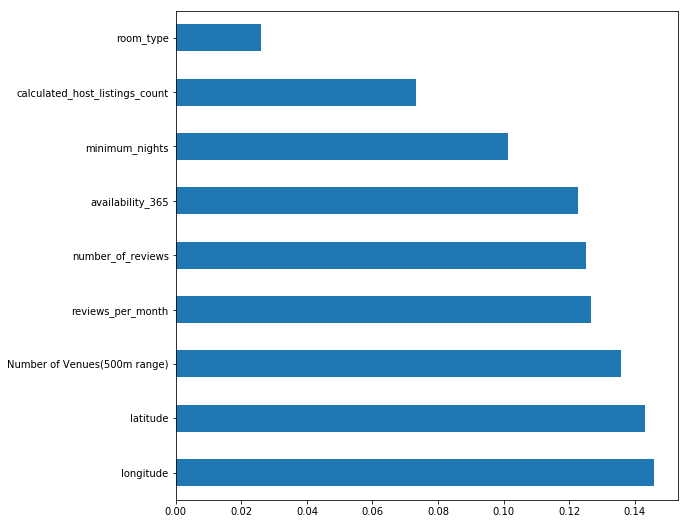

In [144]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(9,9))
feat_importances = pd.Series(feature_model.feature_importances_, index=X.iloc[:,:].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## d. Removing remaining outliers using z-score

In [172]:
X1=newbronx
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X1._get_numeric_data()))
print(z)
X1= X1[(z < 3).all(axis=1)]
print(X1.shape)

[[0.64462453 1.42610799 0.52634565 ... 0.34464208 1.16407558 0.59268314]
 [1.35651172 1.05054219 0.52634565 ... 2.00455085 1.35158462 1.02867385]
 [1.36365518 1.68808919 1.33405581 ... 4.494414   1.46697481 0.89356077]
 ...
 [1.55916213 0.83550959 0.52634565 ... 0.48531231 1.46697481 0.59268314]
 [1.45769161 0.64870772 0.52634565 ... 0.48531231 0.12556393 0.69089115]
 [1.48873086 1.08895002 0.52634565 ... 0.48531231 0.10392827 0.69089115]]
(681, 10)


In [173]:
X=X1[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','availability_365','Number of Venues(500m range)']]
y=X1['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## e. Using dataset (after outlier removal) consisting of 7 significant attributes.

In [175]:
from sklearn import preprocessing
standardized_X_train = preprocessing.scale(X_train)
standardized_X_test = preprocessing.scale(X_test)
standardized_X_train

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


array([[-1.62945985, -1.43517147,  1.20393643, ..., -0.80317394,
        -1.0673913 , -0.12675772],
       [ 1.55542082, -0.55079835, -0.26564042, ..., -0.39493022,
         1.2636295 ,  1.24227865],
       [-0.01300455, -0.21708516, -0.26564042, ..., -0.01692677,
         1.22776764, -0.63113954],
       ...,
       [ 0.99976432, -0.2306858 ,  0.22421853, ...,  1.09440337,
        -0.57967002,  0.95406046],
       [ 0.03378322, -0.64666625, -0.75549938, ..., -0.97705553,
        -1.1175979 , -0.77524863],
       [-0.24611529, -1.17211525, -0.26564042, ..., -0.97705553,
        -1.1175979 , -0.05470318]])

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(standardized_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
y_pred = regressor.predict(standardized_X_test)

In [178]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 41.756044643477765


#### The final RMSE after outlier removal and after identification of significant attributes is 41.75 dollars. Also a decrease of around 40 dollars in RMSE was found due to this method.